In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import string 
#import sys
import re

import nltk
#nltk.download()
#from __future__ import print_function
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#from nltk.tokenize import sent_tokenize, word_tokenize

#from collections import Counter
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import svm
from sklearn.svm import SVR

# 1. Understanding data

## 1.1 Read datasets

In [2]:
df = pd.read_csv("AppleStore.csv", index_col = 0)
#display(df.head())
df.shape

(7197, 16)

In [3]:
df_description = pd.read_csv("appleStore_description.csv")
display(df_description.head())
df_description.shape

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


(7197, 4)

## 1.2 Merge datasets

In [4]:
df_merge = df.merge(df_description, on='id', how = 'outer')
#df_merge = df_mergefull_data.iloc[:, 1:]
display(df_merge.head())

,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,1,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,1,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,1,Weather,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,3,Shopping,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,1,Reference,37,5,45,1,Bible,92774400,On more than 250 million devices around the wo...


In [5]:
df.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [6]:
df_description.isnull().sum()

id            0
track_name    0
size_bytes    0
app_desc      0
dtype: int64

In [7]:
df_merge.isnull().sum()

id                  0
track_name_x        0
size_bytes_x        0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
track_name_y        0
size_bytes_y        0
app_desc            0
dtype: int64

## 1.3. Data Visulazition

### 1.3.1 Heatmap-correlation

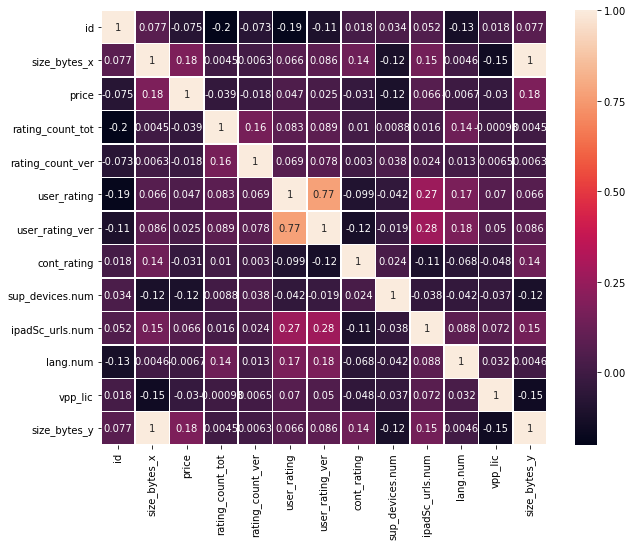

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merge.corr(),annot=True,linewidths=0.5);
plt.show()

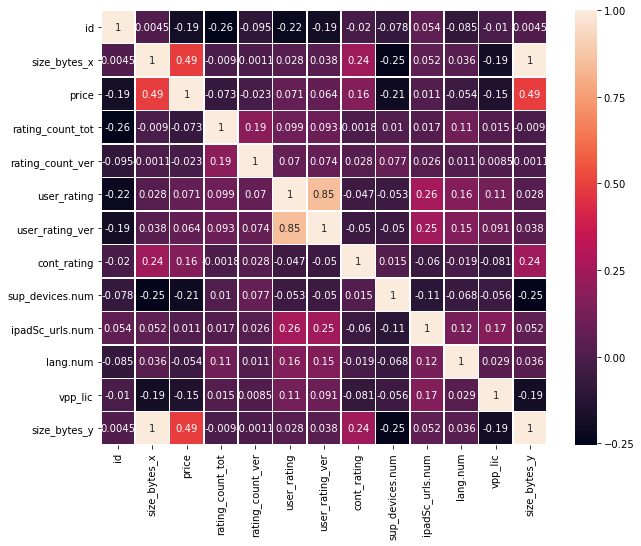

In [9]:
df_game = df_merge[df_merge['prime_genre'] == 'Games']
plt.figure(figsize=(10,8))
sns.heatmap(df_game.corr(),annot=True,linewidths=0.5);
plt.show()

### 1.3.2 APP count with category

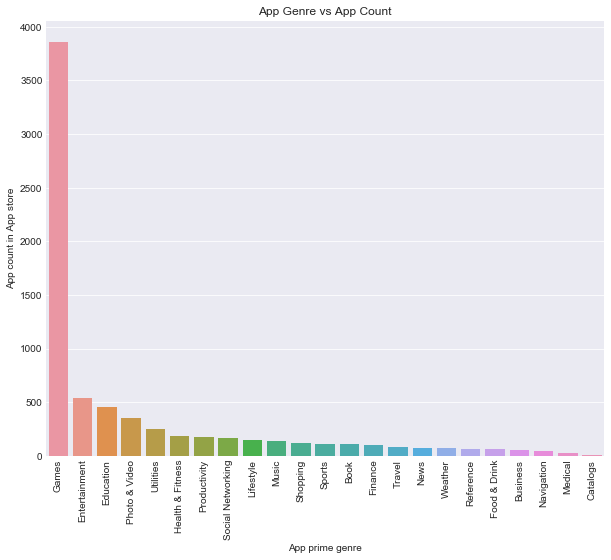

In [10]:
# count of apps for different app_genre categories in app store
app_count=df["prime_genre"].value_counts().reset_index()

# Plot of app counts for the various app_genre categories
plt.figure(figsize = (10, 8), facecolor = None)
sns.set_style("darkgrid")
plot1 = sns.barplot(x="index", y="prime_genre", data=app_count)

plot1.set_xticklabels(app_count['index'], rotation=90, ha="center")
plot1.set(xlabel='App prime genre',ylabel='App count in App store')
plot1.set_title('App Genre vs App Count')
plt.show()

*Games are the most numerous, followed by Entertainment, Education, Photo & Video.

In [11]:
#df_game = df[df['prime_genre'] == "Games"]
df_game = df_merge[df_merge['prime_genre'] == 'Games']
df_other = df_merge[df_merge['prime_genre'] != "Games" ]

print('There are {} Game Apps in this dataset'.format(df_game.shape[0]))
print('There are {} not Game Apps in this dataset'.format(df_other.shape[0]))

print("Games percentage:",len(df[df["prime_genre"] == "Games"])/len(df))

There are 3862 Game Apps in this dataset
There are 3335 not Game Apps in this dataset
Games percentage: 0.5366124774211477


In [12]:
df.prime_genre.value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

### 1.3.3.Price distribution

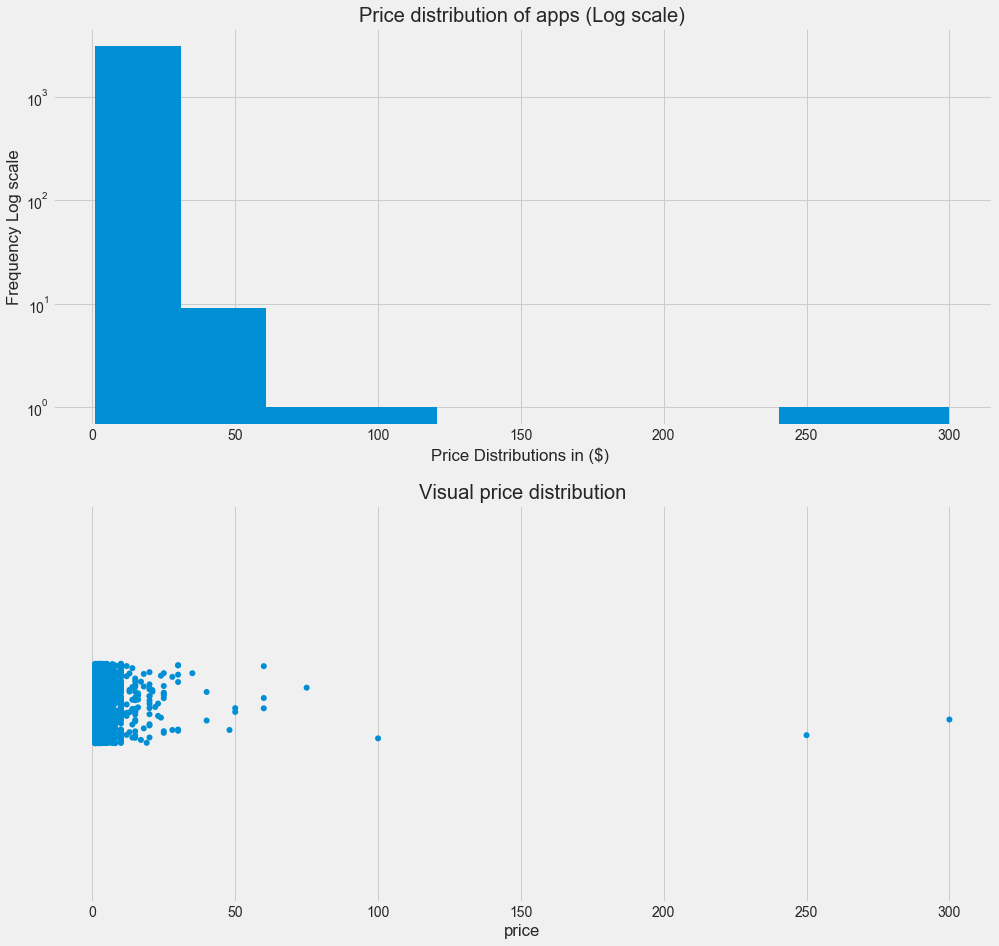

In [13]:
paidapps =df_merge[((df_merge.price<1000000) & (df_merge.price>0))]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)

plt.hist(paidapps.price,log=True)
plt.title('Price distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("Price Distributions in ($) ")

plt.subplot(2,1,2)
plt.title('Visual price distribution')
sns.stripplot(data=paidapps,y='price',jitter= True,orient = 'h' ,size=6)
plt.show()

In [14]:
df_merge[df_merge['price']>50]

,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
115,308368164,Proloquo2Go - Symbol-based AAC,723764224,USD,249.99,773,10,4.0,3.5,5.0.1,1,Education,37,5,3,1,Proloquo2Go - Symbol-based AAC,723764224,Proloquo2Go is an award-winning symbol-support...
162,320279293,NAVIGON Europe,144412672,USD,74.99,927,3,3.5,2.5,2.17,1,Navigation,37,2,21,1,NAVIGON Europe,144412672,"Whether on holiday, taking a weekend trip or h..."
1136,491998279,Articulation Station Pro,425919488,USD,59.99,294,130,4.5,5.0,2.2.3,1,Education,38,5,1,1,Articulation Station Pro,425919488,"""Little Bee Speech has created a real gem. Art..."
1479,551215116,LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,1,Education,24,5,1,1,LAMP Words For Life,583263232,LAMP Words For Life™ is a full English vocabul...
2181,700440156,Articulation Test Center Pro,174737408,USD,59.99,29,0,4.5,0.0,2.6,1,Education,24,5,1,1,Articulation Test Center Pro,174737408,Created by certified Speech-Language Pathologi...
2568,849732663,KNFB Reader,106429440,USD,99.99,71,0,4.5,0.0,2.7.3,1,Productivity,37,5,14,1,KNFB Reader,106429440,Take a pic. The app reads the print. \nThe app...
3238,946930094,FineScanner Pro - PDF Document Scanner App + OCR,63974400,USD,59.99,100,4,4.0,4.5,6.2.5,1,Business,37,5,12,1,FineScanner Pro - PDF Document Scanner App + OCR,63974400,FineScanner turns your mobile device into a po...


### 1.3.4 Avg user rating vs APP genre

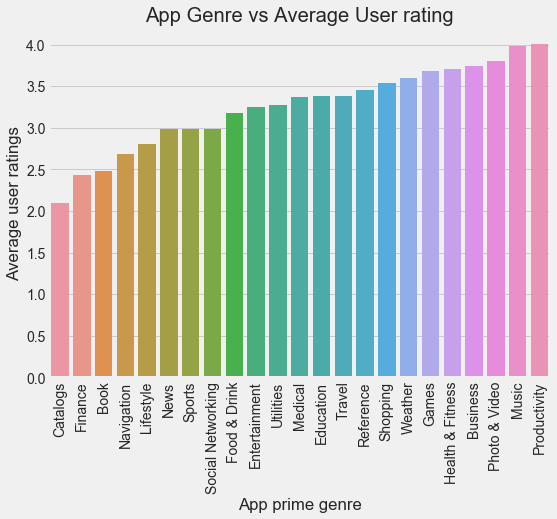

In [15]:
# Getting the mean user ratings for the different App genre categories
mean_user_ratings=df_merge.groupby('prime_genre')['user_rating'].mean().reset_index().sort_values(by=['user_rating'])

# plotting values for Average User rating vs App Genre
plt.figure(figsize = (8, 6), facecolor = None)
plot2 = sns.barplot(x="prime_genre", y="user_rating", data=mean_user_ratings, order=mean_user_ratings['prime_genre'])

plot2.set_xticklabels(mean_user_ratings['prime_genre'], rotation=90, ha="center")
plot2.set(xlabel='App prime genre',ylabel='Average user ratings')
plot2.set_title('App Genre vs Average User rating')
plt.show()

### 1.3.5 user_rating count

*The Apps for Productivity, Music and Photo & Vidio have higher mean user rating.

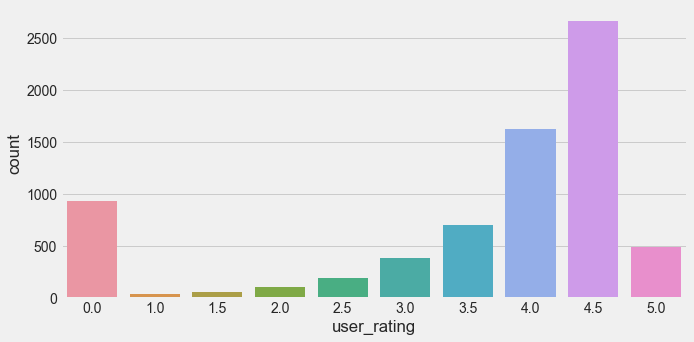

In [16]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
sns.countplot(df_merge["user_rating"])
plt.show()

# 2. Text mining

In [17]:
searchfor = ['save', 'discount']
df_search = df_merge[df_merge.app_desc.str.contains('|'.join(searchfor))]
display(df_search.head())

,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,1,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,3,Shopping,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
10,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,1,Games,38,4,11,1,Solitaire by MobilityWare,49618944,Solitaire by MobilityWare is the ORIGINAL make...
14,284862767,FreeCell,55153664,USD,4.99,6340,668,4.5,4.5,4.0.3,1,Games,38,5,2,1,FreeCell,55153664,Play the BEST FreeCell Solitaire game on your ...
15,284876795,TripAdvisor Hotels Flights Restaurants,207907840,USD,0.00,56194,87,4.0,3.5,21.1,1,Travel,37,1,26,1,TripAdvisor Hotels Flights Restaurants,207907840,"Millions of traveler reviews, photos, and maps..."


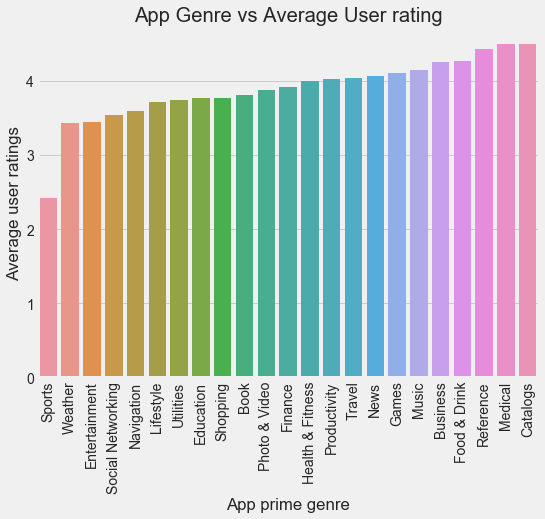

In [18]:
# Getting the mean user ratings for the different App genre categories
mean_user_ratings=df_search.groupby('prime_genre')['user_rating'].mean().reset_index().sort_values(by=['user_rating'])

# plotting values for Average User rating vs App Genre
plt.figure(figsize = (8, 6), facecolor = None)
plot2 = sns.barplot(x="prime_genre", y="user_rating", data=mean_user_ratings, order=mean_user_ratings['prime_genre'])

plot2.set_xticklabels(mean_user_ratings['prime_genre'], rotation=90, ha="center")
plot2.set(xlabel='App prime genre',ylabel='Average user ratings')
plot2.set_title('App Genre vs Average User rating')
plt.show()

## 2.1 Words frequency analysis 


In [19]:
display(df_game.head())
wordlist = df_game.app_desc.str.split(expand=True).stack().value_counts()
print(wordlist.head())
print("Total number of words:", sum(wordlist.values))

,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,1,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,1,Games,47,5,1,1,Shanghai Mahjong,10485713,"★ WINNER ""BEST GAME"" 2009\n★ 3rd PLACE WINNER ..."
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,1,Games,38,0,10,1,Ms. PAC-MAN,70023168,Now with MFi controller support!\n\nMs. PAC-MA...
10,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,1,Games,38,4,11,1,Solitaire by MobilityWare,49618944,Solitaire by MobilityWare is the ORIGINAL make...
11,284815117,SCRABBLE Premium,227547136,USD,7.99,105776,166,3.5,2.5,5.19.0,1,Games,37,0,6,1,SCRABBLE Premium,227547136,CONNECT WITH FRIENDS. PLAY WITH WORDS. Get a g...


the     32426
and     29598
to      22262
of      16399
your    14078
dtype: int64
Total number of words: 865384


### 2.1.1 Non-English reviews

In [20]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True


def English_review(df):
    boo = []
    i = 0
    for x in df.track_name_x:

        boo.append(isEnglish(x))
        boo[i] = isEnglish(x)

        i+= 1

    df['Engornot'] = boo
    return df

def Englist_count(df):
    
    i =0
    j =0
    for y in df_game.Engornot:
        if y == True:
            i += 1
        else:
            j += 1
    print("English charaters: ", i)
    print("Non-English characters: ", j)


In [21]:
df_game_e = English_review(df_game)
df_game_english = df_game_e[df_game_e['Engornot'] == True]
display(df_game_english.head())

wordlist2 = df_game_english.app_desc.str.split(expand=True).stack().value_counts()
print(wordlist2.head())
print("Total number of English words:", sum(wordlist2.values))


Englist_count(df_game)


/Users/elenatong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc,Engornot
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,1,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n...",True
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,1,Games,47,5,1,1,Shanghai Mahjong,10485713,"★ WINNER ""BEST GAME"" 2009\n★ 3rd PLACE WINNER ...",True
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,1,Games,38,0,10,1,Ms. PAC-MAN,70023168,Now with MFi controller support!\n\nMs. PAC-MA...,True
10,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,1,Games,38,4,11,1,Solitaire by MobilityWare,49618944,Solitaire by MobilityWare is the ORIGINAL make...,True
11,284815117,SCRABBLE Premium,227547136,USD,7.99,105776,166,3.5,2.5,5.19.0,1,Games,37,0,6,1,SCRABBLE Premium,227547136,CONNECT WITH FRIENDS. PLAY WITH WORDS. Get a g...,True


the     29845
and     27167
to      20517
of      15078
your    12911
dtype: int64
Total number of English words: 784482
English charaters:  3165
Non-English characters:  697


### 2.1.2 remove stopwords

In [22]:
def remove_stopwords(df):
    
    num =[]
    nostopword_des = []
    i = 0
    exclude = set(string.punctuation)

    for x in df.app_desc:
        x = re.sub(r'[^\w\s]','',x)
        #print(x.split())
        filtered_sentence = []
        for r in x.split():
            if not r.lower() in stopwords.words('english'):
                filtered_sentence.append(r)

        #print (filtered_sentence)
        num.append(len(filtered_sentence))
        nostopword_des.append(filtered_sentence)

        num[i] = len(filtered_sentence)
        nostopword_des[i] = filtered_sentence
        i+= 1

    df['word_num'] = num
    df['nostopword_des'] = nostopword_des
    #display(df.head(10))
    return df

def frequency_words(df):
    
    pd.set_option('display.max_colwidth', -1)
    wordlists = pd.Series(np.concatenate([x for x in df.nostopword_des])).value_counts()
    return wordlists



In [23]:
df_game_re = remove_stopwords(df_game_english)
df_game_wordlist = frequency_words(df_game_re)
#display(df_game_wordlist.head())

print(df_game_wordlist.head())
print("Total number of English words after removing stop words:", sum(df_game_wordlist.values))

wordList = pd.DataFrame({'wordlists':df_game_wordlist.index, 'frequence':df_game_wordlist.values})
#display(wordList.head(10))

/Users/elenatong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/elenatong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


game     6531
new      2718
play     2400
games    1794
world    1790
dtype: int64
Total number of English words after removing stop words: 477214


### 2.1.3 Word stemming

In [25]:
def word_stemming(wordList):
    wordlists_stemming = []
    ps = PorterStemmer() 
    for word in wordList["wordlists"]:
        wordlists_stemming.append(ps.stem(word))
    wordList['wordlists_stem'] = wordlists_stemming
    return wordList
    
wordlt_stemming = word_stemming(wordList)
display(wordlt_stemming.head(10))

,frequence,wordlists,wordlists_stem
0,6531,game,game
1,2718,new,new
2,2400,play,play
3,1794,games,game
4,1790,world,world
5,1585,us,us
6,1549,Game,game
7,1438,friends,friend
8,1401,fun,fun
9,1361,time,time


In [57]:
wl = wordlt_stemming.drop(['wordlists'], axis = 1)
#display(wl)
aggregation_functions = {'frequence': 'sum'}
wordList_new = wl.groupby(wl["wordlists_stem"].aggregate(aggregation_functions))
#wordList_new = wl[['frequence']].apply(lambda x: ''.join(x), axis=0)
#wordList_new = wl.groupby(wl["frequence"]).apply(lambda x: x['wordlists_stem'].sum())
#wordList_new = wl['frequence'].groupby(wl["wordlists_stem"]).apply(lambda x: x)
display(wordList_new.head(10))


,frequence,wordlists_stem
0,6531,game
1,2718,new
2,2400,play
3,1794,game
4,1790,world
5,1585,us
6,1549,game
7,1438,friend
8,1401,fun
9,1361,time


In [111]:
wl_new = {}

In [112]:
unique_types = wl['wordlists_stem'].unique()

In [113]:
for t in unique_types:
    total_freq = wl[wl['wordlists_stem'] == t]['frequence'].sum()
    wl_new[t] = total_freq

In [114]:
wl_new

{'game': 11098,
 'new': 3566,
 'play': 4725,
 'world': 2628,
 'us': 1585,
 'friend': 1773,
 'fun': 1613,
 'time': 1831,
 'get': 1989,
 'like': 1735,
 'one': 1522,
 'player': 1893,
 'ipad': 1215,
 'level': 2060,
 'iphon': 1130,
 'app': 2114,
 'uniqu': 1206,
 'free': 1674,
 'differ': 1126,
 'way': 1152,
 'best': 1538,
 'make': 1515,
 '2': 951,
 'experi': 1318,
 'item': 1063,
 'may': 883,
 'facebook': 888,
 'use': 2350,
 'featur': 2558,
 'gameplay': 964,
 'real': 940,
 'help': 1166,
 'mode': 1731,
 'charact': 1183,
 'even': 806,
 'adventur': 1126,
 'graphic': 949,
 'skill': 1000,
 '3': 690,
 '5': 687,
 'inapp': 813,
 'enjoy': 1112,
 'mobil': 860,
 'mani': 738,
 'includ': 1254,
 'devic': 1384,
 'find': 1027,
 'unlock': 1136,
 'purchas': 1372,
 'take': 1355,
 'everi': 755,
 'puzzl': 1499,
 '4': 621,
 '3D': 619,
 'also': 693,
 'follow': 962,
 '1': 595,
 'around': 607,
 'io': 590,
 'love': 858,
 'special': 741,
 'enemi': 862,
 'avail': 621,
 'back': 613,
 'battl': 1258,
 'action': 701,
 'twit

In [128]:
temp_wl = pd.DataFrame.from_dict(wl_new, orient='index').reset_index()
temp_wl.columns = ['wordlists_stem', 'freqence']

In [129]:
temp_wl

,wordlists_stem,freqence
0,game,11098
1,new,3566
2,play,4725
3,world,2628
4,us,1585
5,friend,1773
6,fun,1613
7,time,1831
8,get,1989
9,like,1735


In [1]:
#pd.DataFrame(data = wl_new)

In [2]:
#wl.groupby('wordlists_stem').agg({'frequence': 'sum'})

### 2.1.4 Part-of-Speech tagging

In [19]:
def part_of_speech(wordlists):
    cixing = []
    ci = 0
    for w in wordlists.index:

        if wn.synsets(w):
            cixing.append(wn.synsets(w)[0].pos())
            cixing[ci] = wn.synsets(w)[0].pos()
            ci+=1
        else:
            cixing.append("null")
            cixing[ci] = "null"
            ci+=1
    wordList['wordxing'] = cixing
    wordList.to_csv("wordlist.csv", sep='\t')
           # f.write(w + ":" + tmp + "\n\r")

        #print (w, ":", tmp)
    return wordList

In [20]:
wl2 = part_of_speech(wordList_new)
display(wl2.head(10))

NameError: name 'wordList_new' is not defined

In [24]:
df_goodgame = df_game[df_game['user_rating'] >= 4.0]

print ("Destription words mean is %f\r\n" %(np.mean(df_goodgame.word_num)))

remove_stopwords(df_goodgame)

wordlists = frequency_words(df_goodgame)

cc = 0
for p in wordlists:
    if p >= 99:
        cc += 1
print ("words frequence more than 99 times ", cc)

f = open("output.txt", "w+")
i = 0
for p in wordlists.index: 
     i += 1
     f.write(p + "%d\n\r" %(i))

     #print(p)



Destription words mean is 155.095188



KeyboardInterrupt: 

In [68]:
# df_game
#display(df_game.head())
#wordlist = df_game.app_desc.str.split(expand=True).stack().value_counts()
#print(wordlist.head())
print ("Game destription words mean is %f\r\n" %(np.mean(df_game.word_num)))
Englist_count(df_game)

df_game_e = English_review(df_game)
df_game_english = df_game_e[df_game_e['Engornot'] == True]
#display(df_game_english.head())

df_game_re = remove_stopwords(df_game_english)
df_game_wordlist = frequency_words(df_game_re)
#print(df_game_wordlist)
wordList = pd.DataFrame({'wordlists':df_game_wordlist.index, 'frequence':df_game_wordlist.values})
print(wordList)

Game destription words mean is 137.494045

English charaters:  3165
Non-English characters:  697


/Users/elenatong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

# 3. Prediction

## 3.1 preprocessing

In [28]:
dt = df.drop(['id','track_name','currency','ver'], axis = 1)
#display(dt.head())

## Relevance as absolute measure and relevance by genre
dt["abs_relevance"] = 0
dt["genre_relevance"] = 0

genres = dt['prime_genre'].unique().tolist()
#print(genres)
#print(len(genres))

for i in genres:
    dt.loc[dt["prime_genre"] == i,"genre_relevance"] = \
    (dt[dt["prime_genre"] == i]["rating_count_tot"] / dt[dt["prime_genre"] == i]["rating_count_tot"].max() \
    + dt[dt["prime_genre"] == i]["user_rating"] / dt[dt["prime_genre"] == i]["user_rating"].max() )/ 2

dt["abs_relevance"] = (dt["rating_count_tot"]/dt["rating_count_tot"].max()+dt["user_rating"]/dt["user_rating"].max())/2
display(dt.head())

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,abs_relevance,genre_relevance
1,100788224,3.99,21292,26,4.0,4.5,1,Games,38,5,10,1,0.403579,0.404996
2,158578688,0.00,161065,26,4.0,3.5,1,Productivity,37,5,23,1,0.427073,0.900000
3,100524032,0.00,188583,2822,3.5,4.5,1,Weather,37,5,3,1,0.381698,0.540247
4,128512000,0.00,262241,649,4.0,4.5,3,Shopping,37,5,9,1,0.444079,0.713851
5,92774400,0.00,985920,5320,4.5,5.0,1,Reference,37,5,45,1,0.615719,0.950000


In [29]:
dt = dt.drop(['prime_genre'], axis = 1)
data_scaled = preprocessing.scale(dt)
data_scaled = pd.DataFrame( data= data_scaled, columns = dt.columns.values)

#X = data_scaled.drop(["user_rating" ], axis = 1)
#Y = dt.user_rating
#x_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [30]:
#Classification
def compute_measure(y_pred, y_test):
    t_idx = (y_pred == y_test) # truely predicted
    #This is an almost pure python coding. You can use other packages to make this concise
    f_idx = np.logical_not(t_idx) # falsely predicted
    
    p_idx = (y_test > 0) # positive targets 
    n_idx = np.logical_not(p_idx) # negative targets
    
    
    tp = np.sum( np.logical_and(t_idx, p_idx)) # TP 
    tn = np.sum( np.logical_and(t_idx, n_idx)) # TN
    # false positive: original negative but classified as positive 
    # false negative: original positive but classified as negative
    fp = np.sum(n_idx) - tn 
    fn = np.sum(p_idx) - tp
    tp_fp_tn_fn_list=[] 
    tp_fp_tn_fn_list.append(tp) 
    tp_fp_tn_fn_list.append(fp) 
    tp_fp_tn_fn_list.append(tn) 
    tp_fp_tn_fn_list.append(fn) 
    tp_fp_tn_fn_list=np.array(tp_fp_tn_fn_list)
    tp=tp_fp_tn_fn_list[0] 
    fp=tp_fp_tn_fn_list[1] 
    tn=tp_fp_tn_fn_list[2] 
    fn=tp_fp_tn_fn_list[3]
    with np.errstate(divide='ignore'): 
        sen = (1.0*tp)/(tp+fn)
    with np.errstate(divide='ignore'): 
        spc = (1.0*tn)/(tn+fp)
    with np.errstate(divide='ignore'): 
        ppr = (1.0*tp)/(tp+fp)
    with np.errstate(divide='ignore'): 
        npr = (1.0*tn)/(tn+fn)
    
    f1 = (2.0*tp)/(2.0*tp+fp+fn)
    acc = (tp+tn)*1.0/(tp+fp+tn+fn) 
    ans=[]
    ans.append(acc)
    ans.append(sen)
    ans.append(spc) 
    ans.append(ppr) 
    ans.append(npr)
    ans.append(f1)

    return ans
     

In [31]:
#LDA
def lda_function(X_train, X_test, y_train, y_test):
    #model = LDA(n_components=None, priors=None)
    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train.astype('int'))
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred.astype('int'))
    #target_names = ['class 0', 'class 1']
    #classification_report(y_test, y_pred, target_names=target_names)
    #print(classification_report(y_test, y_pred, target_names=target_names))
    #print("MSE is ", mse)
    
    lda_ans = compute_measure(y_pred, y_test.astype('int'))
    return mse, lda_ans
#lda_results = lda_function(X_train, X_test, y_train, y_test)    

In [32]:
#Logistic Regression
def lg_function(X_train, X_test, y_train, y_test):
    lg = LogisticRegression()
    lg.fit(X_train, y_train.astype('int'))
    y_pred = lg.predict(X_test)
    mse = mean_squared_error(y_test,y_pred.astype('int'))
    lg_ans = compute_measure(y_pred, y_test.astype('int'))
    return mse, lg_ans
#lg_results = lg_function(X_train, X_test, y_train, y_test)




In [33]:
#Logistic Regression
def lg_function2(x_train, X_test, y_train, Y_test):
    lg = LogisticRegression()
    lg.fit(x_train, y_train.astype('int'))
    y_pred = lg.predict(X_test)
    score = lg.score(X_test,Y_test.astype('int'))
    
    return score



scores = lg_function2(x_train, X_test, y_train, Y_test)
print(scores)
#ans, metrics.auc(fpr, tpr), y_pred = lg_function(x_train, X_test, y_train, Y_test)

NameError: name 'x_train' is not defined

In [34]:
#Random forest
def rf_function(X_train, X_test, y_train, y_test):
    ef = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    #ef = RandomForestClassifier(max_depth=2, random_state=0)
    ef.fit(X_train, y_train.astype('int'))
    y_pred = ef.predict(X_test)
    mse = mean_squared_error(y_test,y_pred.astype('int'))
    rf_ans = compute_measure(y_pred, y_test.astype('int'))
    return mse, rf_ans
#rf_results = rf_function(X_train, X_test, y_train, y_test)

In [35]:
#Extremely randomized trees
def ert_function(X_train, X_test, y_train, y_test):
    ert = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

    ert.fit(X_train, y_train.astype('int'))
    y_pred = ert.predict(X_test)
    mse = mean_squared_error(y_test,y_pred.astype('int'))
    ert_ans = compute_measure(y_pred, y_test.astype('int'))
    return mse, ert_ans
#ert_results = ert_function(X_train, X_test, y_train, y_test)

In [36]:
# MLP-adam
def MLP_adam(X_train, X_test, y_train, y_test):
    neuron_no = 200 
    hiddle_layer_no = 2

    mlp=MLPClassifier(solver='adam',alpha=1e-5, hidden_layer_sizes=(neuron_no, hiddle_layer_no), random_state=None)
    mlp.fit(X_train, y_train.astype('int'))
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test,y_pred.astype('int'))
    adam_ans = compute_measure(y_pred, y_test.astype('int'))
    return mse, adam_ans
#adam_results = MLP_adam(X_train, X_test, y_train, y_test)       

In [37]:
#MLP-SGD
def MLP_SGD(X_train, X_test, y_train, y_test):
    neuron_no = 200 
    hiddle_layer_no = 2

    mlp=MLPClassifier(solver='sgd',alpha=1e-5, hidden_layer_sizes=(neuron_no, hiddle_layer_no), random_state=None)
    mlp.fit(X_train, y_train.astype('int'))
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test,y_pred.astype('int'))
    sgd_ans = compute_measure(y_pred, y_test.astype('int'))
    return mse, sgd_ans
#sgd_results = MLP_SGD(X_train, X_test, y_train, y_test)

In [38]:
#MLP-lbfgs
def MLP_lbfgs(X_train, X_test, y_train, y_test):
    neuron_no = 200 
    hiddle_layer_no = 2

    mlp=MLPClassifier(solver='lbfgs',alpha=1e-5, hidden_layer_sizes=(neuron_no, hiddle_layer_no), random_state=1)
    mlp.fit(X_train, y_train.astype('int'))
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test,y_pred.astype('int'))
    lbfgs_ans = compute_measure(y_pred, y_test.astype('int'))
    return mse, lbfgs_ans
#lbfgs_results = MLP_lbfgs(X_train, X_test, y_train, y_test)

In [39]:
def K_Fold(data_scaled, data, method, k, label):
    X = data_scaled.drop([label], axis = 1)
    Y = dt[label]
    
    kf = KFold(n_splits=k)
    kf.get_n_splits(X)
      

    KFold(n_splits=k, random_state=None, shuffle=False)
    summary = pd.DataFrame(data=[], columns=["MSE", "Accuracy", "Sensiticity", "Specificity", "PPR", "NPR", "F-1 scores"])
    
    for train_index, test_index in kf.split(X):
        #print("\nTRAIN:", train_index, "TEST:", test_index)
        X_train_k, X_test_k = X.iloc[train_index], X.iloc[test_index]
        y_train_k, y_test_k = Y.iloc[train_index], Y.iloc[test_index]
        
        if method =='LDA':
            mse, ans = lda_function(X_train_k, X_test_k, y_train_k, y_test_k)
        elif method =='Logistic Regression':
            mse, ans = lg_function(X_train_k, X_test_k, y_train_k, y_test_k)
        elif method =='Random Forest':
            mse, ans = rf_function(X_train_k, X_test_k, y_train_k, y_test_k)
        elif method =='Extremely Randomized trees':
            mse, ans = ert_function(X_train_k, X_test_k, y_train_k, y_test_k)
        else: 
            if method =='adam':
                mse, ans = MLP_adam(X_train_k, X_test_k, y_train_k, y_test_k)
            elif method =='sgd':
                mse, ans = MLP_SGD(X_train_k, X_test_k, y_train_k, y_test_k)
            else:
                mse, ans = MLP_lbfgs(X_train_k, X_test_k, y_train_k, y_test_k)
                
        measures = []
        measures = np.append(measures, mse)
        measures = np.append(measures, ans)
        
        result_ser = pd.Series(measures, index= ["MSE","Accuracy", "Sensiticity", "Specificity", "PPR", "NPR", "F-1 scores"])
        #print(result_ser)

        summary = summary.append(result_ser,ignore_index=True)
        #print(summary)
        
    return summary, np.mean(summary, axis = 0)

In [40]:
def result_function(data_scaled, data, k, label):
    summary = pd.DataFrame(data=[], columns=["Method", "MSE","Accuracy", "Sensiticity", "Specificity", "PPR", "NPR", "F-1 scores"])
    methods = [ "LDA", "Logistic Regression", "Random Forest", "Extremely Randomized trees", "adam", "sgd", "lbfgs"]

    for method in methods:
        summ, avg = K_Fold(data_scaled, data, method, k, label)
        summary = summary.append(pd.Series(avg, index=["Method", "MSE","Accuracy", "Sensiticity", "Specificity", "PPR", "NPR", "F-1 scores"]), ignore_index=True)
    summary.Method = [ "LDA", "Logistic_Regression", "Random_Forest", "Extremely_Randomized_Trees", "Deep_Learning with Adam", "Deep_Learning with sgd", "Deep_Learning with lbfgs"]
    
    return summary

In [39]:
result_function(data_scaled, dt, 3, 'user_rating')

/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Method,MSE,Accuracy,Sensiticity,Specificity,PPR,NPR,F-1 scores
0,LDA,0.130506,0.996943,0.996786,1.000000,1.000000,0.944595,0.998386
1,Logistic_Regression,0.285987,0.741837,0.701149,1.000000,1.000000,0.310005,0.823912
2,Random_Forest,0.126893,0.994164,0.993844,1.000000,1.000000,0.908141,0.996896
3,Extremely_Randomized_Trees,0.128838,0.989023,0.988319,1.000000,1.000000,0.860350,0.994082
4,Deep_Learning with Adam,0.217903,0.972211,0.970675,0.998113,0.999465,0.761110,0.984662
5,Deep_Learning with sgd,0.260282,0.862026,0.840227,1.000000,1.000000,0.443885,0.913073
6,Deep_Learning with lbfgs,0.143845,0.975129,0.973832,1.000000,1.000000,0.790175,0.986416


In [183]:
result_function(data_scaled, dt, 3, 'user_rating_ver')

/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Method,MSE,Accuracy,Sensiticity,Specificity,PPR,NPR,F-1 scores
0,LDA,1.715020,0.609837,0.592755,0.625014,0.881821,0.278646,0.708470
1,Logistic_Regression,1.814506,0.616090,0.590885,0.670962,0.893291,0.291088,0.710786
2,Random_Forest,0.554537,0.753786,0.694233,1.000000,1.000000,0.447625,0.818882
3,Extremely_Randomized_Trees,1.563012,0.680006,0.653906,0.757913,0.926210,0.356232,0.766394
4,Deep_Learning with Adam,1.962623,0.641656,0.624438,0.649262,0.897611,0.304227,0.734945
5,Deep_Learning with sgd,1.751841,0.619286,0.599643,0.640245,0.889287,0.285738,0.715273
6,Deep_Learning with lbfgs,1.865777,0.646380,0.634368,0.642155,0.895453,0.309487,0.742245


In [41]:
result_function(data_scaled, dt, 3, 'rating_count_tot')

/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/elenatong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


,Method,MSE,Accuracy,Sensiticity,Specificity,PPR,NPR,F-1 scores
0,LDA,5.497693e+09,0.139086,0.016600,0.972938,0.798451,0.128255,0.032278
1,Logistic_Regression,5.215105e+09,0.144505,0.018606,1.000000,1.000000,0.131711,0.036306
2,Random_Forest,4.449760e+09,0.168265,0.046908,1.000000,1.000000,0.135695,0.088621
3,Extremely_Randomized_Trees,4.119265e+09,0.148673,0.023552,1.000000,1.000000,0.132371,0.045716
4,Deep_Learning with Adam,5.879161e+09,0.141587,0.015307,0.996914,0.966667,0.131134,0.029978
5,Deep_Learning with sgd,5.901868e+09,0.130054,0.001018,1.000000,1.000000,0.129125,0.002031
6,Deep_Learning with lbfgs,5.901356e+09,0.144644,0.019834,0.990795,0.926260,0.131200,0.038571


In [42]:
result_function(data_scaled, dt, 3, 'rating_count_ver')

/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Method,MSE,Accuracy,Sensiticity,Specificity,PPR,NPR,F-1 scores
0,LDA,2.000868e+07,0.229818,0.043061,0.976906,0.882253,0.204140,0.081877
1,Logistic_Regression,1.540935e+07,0.243296,0.054569,0.999025,0.995935,0.209826,0.103168
2,Random_Forest,2.454847e+07,0.254967,0.069837,1.000000,1.000000,0.213124,0.129400
3,Extremely_Randomized_Trees,1.791805e+07,0.242601,0.053711,1.000000,1.000000,0.209911,0.101469
4,Deep_Learning with Adam,1.519894e+07,0.251633,0.064857,1.000000,1.000000,0.211757,0.121482
5,Deep_Learning with sgd,1.557887e+07,0.239544,0.049639,0.999025,0.995781,0.208849,0.094404
6,Deep_Learning with lbfgs,1.553835e+07,0.250521,0.064341,0.995831,0.985493,0.211075,0.120473


In [202]:
result_function(data_scaled, dt, 3, 'abs_relevance')

/Users/elenatong/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:402: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]
/Users/elenatong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/elenatong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
/Users/elenatong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
result_function(data_scaled, dt, 3, 'genre_relevance')